## Работа с таблицами и визуализация

In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# зададим параметры рисуемых нами графиков, например, размер
plt.rcParams['figure.figsize'] = (10, 5)

In [150]:
df = pd.read_csv('youtube_data_short.csv', sep='\t')

In [7]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.columns

Index(['title', 'commentCount', 'dislikeCount', 'likeCount', 'music_style',
       'performer', 'viewCount', 'commentators_uniq', 'comments_obscene_cnt',
       'video_age'],
      dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=19124, step=1)

## Что можно и нужно делать с таблицами

### 1. Доставать часть данных

#### Типы данных

- `int` – целые числа
- `float` – вещественные числа
- `object` – строки
- `bool` – булевский
- `date` – дата

In [15]:
type(df['title'])

pandas.core.series.Series

In [17]:
df['title'].values

array(['"#2Маши "Свободные линии"',
       '"ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )',
       '"EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MICHAEL JACKSON ( Cover version)',
       ..., "モスクワライブショー ' 17",
       "舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year Baby (Fan's  Video)",
       '🎄#премьера песни!!! 2019г(вы не спешите говорит)группа.Бутырка.'],
      dtype=object)

In [19]:
df.title

0                                "#2Маши "Свободные линии"
1                "ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )
2        "EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MIC...
3                   "Earth song" премия МУЗ-тВ 2010 (LIVE)
4                           "FAKE" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)
                               ...                        
19119                  ♫♪Мы расстаемся ♫♪  Бутырка new2019
19120    ❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...
19121                                      モスクワライブショー ' 17
19122    舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year ...
19123    🎄#премьера песни!!! 2019г(вы не спешите говори...
Name: title, Length: 19124, dtype: object

In [23]:
useful_cols = ['title', 'commentCount']
df[useful_cols]

,title,commentCount
0,"""#2Маши ""Свободные линии""",34.0
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0
...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0
19121,モスクワライブショー ' 17,4872.0
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0


In [24]:
df.iloc[0, 1]

34.0

In [26]:
df.loc[0, 'commentCount']

34.0

Хотим вытащить все клипы жанра попса.

In [29]:
df.music_style == 'popsa'

0         True
1         True
2         True
3         True
4         True
         ...  
19119    False
19120    False
19121    False
19122    False
19123    False
Name: music_style, Length: 19124, dtype: bool

In [45]:
df_popsa = df[df.music_style == 'popsa']

In [36]:
df_popsa.iloc[3338]

title                   тёлка из клипа-это я. iowa
commentCount                                   106
dislikeCount                                    59
likeCount                                     1064
music_style                                  popsa
performer                                     iowa
viewCount                                   222540
commentators_uniq                               71
comments_obscene_cnt                             0
video_age                                     2577
Name: 19110, dtype: object

In [38]:
df_popsa.loc[19110]

title                   тёлка из клипа-это я. iowa
commentCount                                   106
dislikeCount                                    59
likeCount                                     1064
music_style                                  popsa
performer                                     iowa
viewCount                                   222540
commentators_uniq                               71
comments_obscene_cnt                             0
video_age                                     2577
Name: 19110, dtype: object

In [42]:
df_popsa.reset_index(drop=True, inplace=True)

### 2. Считать что-то над данными

In [47]:
df.likeCount.max()

1686810.0

In [48]:
df[df.likeCount == df.likeCount.max()]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


In [59]:
df.loc[df.dislikeCount == df.dislikeCount.max(), 'title'].iloc[0]

'FACE - Я РОНЯЮ ЗАПАД (prod. by JuloOntheTrack)'

In [69]:
df.commentCount.quantile(0.5)

5.0

In [70]:
df.commentCount.median()

5.0

In [71]:
df.commentCount.mean()

394.02606534841914

In [72]:
df.commentCount.sum()

7452609.0

In [77]:
df.title.apply(len)

0        25
1        41
2        75
3        38
4        30
         ..
19119    35
19120    88
19121    15
19122    65
19123    63
Name: title, Length: 19124, dtype: int64

In [79]:
def first_3_symbols(x):
    return x[:3]


df.title.apply(first_3_symbols)

0        "#2
1        "AL
2        "EA
3        "Ea
4        "FA
        ... 
19119    ♫♪М
19120    ❤ 2
19121    モスク
19122    舞梅鬼
19123    🎄#п
Name: title, Length: 19124, dtype: object

In [82]:
df.title.apply(lambda x: x[:3])

0        "#2
1        "AL
2        "EA
3        "Ea
4        "FA
        ... 
19119    ♫♪М
19120    ❤ 2
19121    モスク
19122    舞梅鬼
19123    🎄#п
Name: title, Length: 19124, dtype: object

### 3. Создавать новые колонки

In [85]:
df['dislike_share'] = df['dislikeCount'] / df['viewCount']

In [87]:
df[df.dislike_share == 1]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,dislike_share


In [92]:
df[df.viewCount > 100_000].sort_values(by='dislike_share', ascending=False)[:3]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,dislike_share
5378,Баста про пенсионную реформу,7290.0,13373.0,6839.0,rap,gazgolder,209934.0,NaN,NaN,27,0.063701
1299,FACE - Я РОНЯЮ ЗАПАД (prod. by JuloOntheTrack),303077.0,640698.0,270794.0,rap,face,14799217.0,1541.0,587.0,382,0.043293
2421,Lil Dik - Ты не тру (Дисс на рэпера Сяву),2395.0,20518.0,6132.0,rap,gazgolder,482455.0,1890.0,693.0,729,0.042528


### 4. Визуализация

<AxesSubplot:>

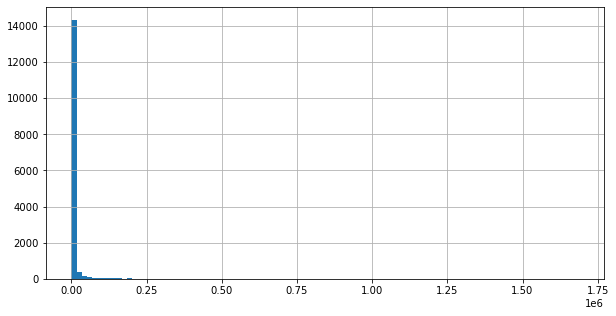

In [103]:
df[df.likeCount > 10].likeCount.hist(bins=100)

<AxesSubplot:>

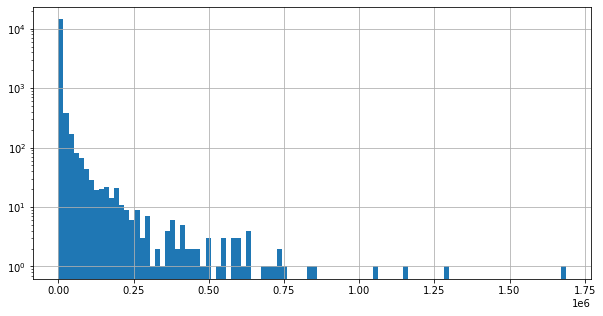

In [104]:
df[df.likeCount > 10].likeCount.hist(bins=100, log=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
 10  dislike_share         18849 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.6+ MB


In [116]:
df['log_likeCount'] = df['likeCount'].apply(lambda x: np.log(x+1))

<AxesSubplot:xlabel='music_style', ylabel='log_likeCount'>

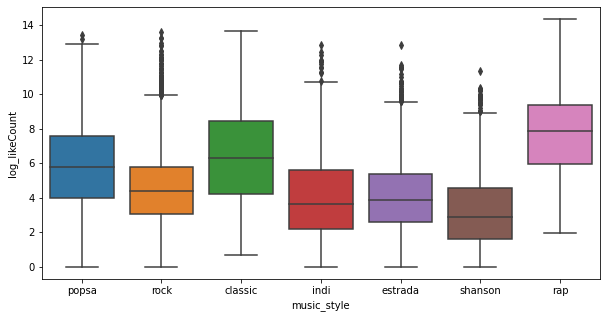

In [117]:
sns.boxplot(data=df, x='music_style', y='log_likeCount')

### 5. Группировка данных

In [119]:
df.dislikeCount.max()

640698.0

In [130]:
df.groupby('music_style')['likeCount'].mean().sort_values(ascending=False)

music_style
classic    28663.333333
rap        26802.456253
popsa       7492.273792
indi        2471.842299
rock        2132.887061
estrada      938.686662
shanson      440.390564
Name: likeCount, dtype: float64

In [133]:
d = {'likeCount': np.sum,
     'dislikeCount': np.mean,
     'title': len}

df.groupby('music_style').agg(d)

,likeCount,dislikeCount,title
music_style,,,
classic,8513010.0,1236.228956,298
estrada,3708751.0,173.565933,4151
indi,3354290.0,220.419307,1359
popsa,24956764.0,790.161513,3339
rap,54221369.0,4099.575383,2028
rock,12445396.0,287.698201,5888
shanson,905443.0,45.488327,2061


In [135]:
df.groupby(['music_style', 'performer']).agg(d)

likeCount  dislikeCount  title
music_style performer                                        
classic     classical_channel  8513010.0   1236.228956    298
estrada     агутин                 118.0      4.666667      3
            басков              193092.0    233.270492    122
            буйнов                 123.0      0.727273     44
            ваенга               67288.0      9.310139    503
...                                  ...           ...    ...
shanson     жека                 69784.0     49.702899    138
            ирина_круг          159637.0    185.847619    105
            михаил_круг         202784.0     44.216495    487
            трофимов             58663.0     15.478448    232
            шуфутинский         123925.0     17.040346    349

[111 rows x 3 columns]

### 6. Чистка данных

#### Пропуски

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
 10  dislike_share         18849 non-null  float64
 11  log_dislikeCount      18850 non-null  float64
 12  log_likeCount         18850 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [140]:
df.isnull().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
dislike_share            275
log_dislikeCount         274
log_likeCount            274
dtype: int64

In [142]:
df.fillna(0)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,dislike_share,log_dislikeCount,log_likeCount
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,0.000201,3.784190,7.246368
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",0.0,690.0,10532.0,popsa,лазарев,2221419.0,0.0,0.0,3217,0.000311,6.538140,9.262268
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,0.000248,2.397895,5.598422
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,0.000588,2.079442,5.099866
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,0.000208,2.995732,6.393591
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,0.0,0.0,44,0.000000,0.000000,2.484907
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,0.001100,6.068426,7.516433
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,0.013049,9.648273,10.328886
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,0.000986,2.397895,5.564520


In [143]:
df.dropna()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,dislike_share,log_dislikeCount,log_likeCount
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,0.000201,3.784190,7.246368
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,0.000248,2.397895,5.598422
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,0.000588,2.079442,5.099866
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,0.000208,2.995732,6.393591
5,"""Feelin High"" Сергей Лазарев Sergey Lazarev live",7.0,7.0,87.0,popsa,лазарев,9217.0,6.0,0.0,3179,0.000759,2.079442,4.477337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19116,♫ Музыка Моцарта для детей (Mozart's music for...,41.0,142.0,914.0,classic,classical_channel,308721.0,22.0,0.0,1748,0.000460,4.962845,6.818924
19117,♫♡ Сборник Лучших Мелодий - Наслаждайтесь Восх...,2881.0,4108.0,58429.0,classic,classical_channel,9577433.0,1696.0,5.0,538,0.000429,8.320935,10.975585
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,0.001100,6.068426,7.516433
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,0.013049,9.648273,10.328886


In [151]:
df.commentCount.fillna(0, inplace=True)

In [148]:
df.dislikeCount.fillna(0, inplace=True)

In [154]:
df.drop('commentators_uniq', axis=1, inplace=True)

**Выбросы**

In [161]:
dislike_q = df.dislikeCount.quantile(0.99)

In [164]:
df = df[df.dislikeCount < dislike_q]

<AxesSubplot:>

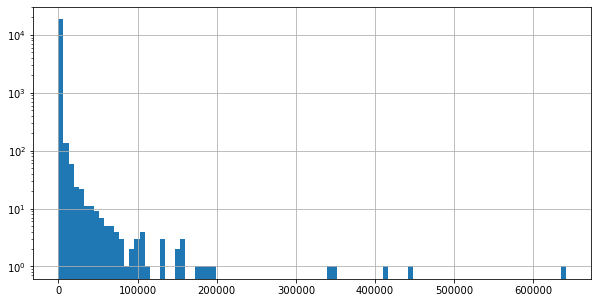

In [163]:
df.dislikeCount.hist(bins=100, log=True)

<AxesSubplot:>

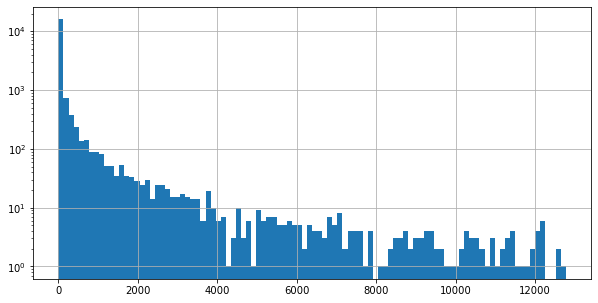

In [165]:
df.dislikeCount.hist(bins=100, log=True)